<a href="https://colab.research.google.com/github/31indianaSKKU/DeepLearning_2022FALL/blob/main/Week06_DeepLearning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #data load
 from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
type(cancer)

sklearn.utils.Bunch

In [5]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [6]:
cancer.data[:2] #0,1번째 행을 출력하라!!(주의 2빼고 0,1)

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

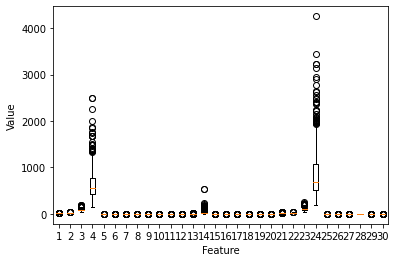

In [7]:
#데이터 분포 확인(박스플롯)
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [8]:
cancer.feature_names[[3,13,23]]  #위의 그림에서 분포가 넓은 변수 확인

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [9]:
#target 데이터 확인
import numpy as np

In [10]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [11]:
#training set 준비

In [12]:
x = cancer.data
y = cancer.target

In [13]:
#A Neuron for logistic Regression

In [14]:
#Training and Test sets
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42)  #stratify:train과 test set의 음성/양성 비율 동일하게. test_size=0.2: train 80: test 20

In [16]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [17]:
np.unique(y_train, return_counts=True)  #y_train의 음성과 양성 갯수 파악

(array([0, 1]), array([170, 285]))

In [18]:
#Logistic Neuron Calss

In [37]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

#fit() method
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])   #1로 초기화
    self.b = 0

    for i in range(epochs):    #위에서 epochs=100으로 설정했으므로 100번 돌리겠다는 의미
      for x_i, y_i in zip(x, y):   #모든 sample만큼 반복
        z = self.fwpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.bwpass(x_i, err)
        self.w -= w_grad         #가중치 update
        self.b -= b_grad         #절편 update
  
  def activation(self, z):
    a = 1 / (1+np.exp(-z))
    return a

#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     print(z)
     a = self.activation(np.array(z))
     return a > 0.5


In [25]:
#Model training

In [41]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


[-6152990.780231503, 857527.5207715916, -579999.8615069335, -946707.6105733241, -6444713.369966477, -156865.71815316824, 676593.4518434979, -3086885.9657221767, -3721201.5176540078, -4609433.343285262, 468475.5293529281, -2136417.8545737807, 415154.2628799699, -4216385.062095479, -2123429.0625964287, -28673.457251995154, -175696.8788437751, 653451.7464674537, -128923.38152522735, 712670.0693753185, -1823448.6483179578, -2139336.1964246426, 472001.0380704406, 709474.915699541, 19385.46768526401, -553007.5958728864, -10888342.685705654, 452323.51608229085, 596623.3790249863, -78150.23735789268, 362492.1871916584, 556595.1660168639, 531838.7948059817, 250539.0984914159, -4480642.10534445, 242700.2950531245, 674227.2743140688, 538062.6363229302, -170702.7262221559, -4609354.444289788, 562896.0199215814, 468964.6470554, 186883.43344184788, -7857714.3203858575, -1887770.9252846225, -833181.0540188048, 912779.105867529, 955320.0449820554, 185398.64270456767, -2728979.745154124, 429904.8743821

0.8245614035087719

In [ ]:
#Loss Function

In [118]:
def __init__(self):  
  self.w = None 
  self.b= None 
  self.losses=[]

In [101]:
"""class SinglelayerNN:
 def fit(self,x,y,epochs=100):
  for i in range(epochs):
    for i in index:
      z = self.fwpass(x[i])
      a = self.activation(z) 
      err=-(y[i]-a)
      w_grad,b_grad=self.bwpass(x[i],err) 
      self.w-=w_grad
      self.b-=b_grad
      #안전한로그계산을위해clipping한후loss를누적함
      a=np.clip(a,1e-10,1-1e-10)
      loss+= -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    self.losses.append(loss/len(y))
"""

In [126]:
class SingleLayerNN:
  #Loss Function
  def __init__(self):  
    self.w = None 
    self.b= None 
    self.losses=[]
 
 #Random permutation for training samples
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

#fit() method
  def fit(self,x,y,epochs=100): 
    self.w = np.ones(x.shape[1])
    self.b = 0

    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.fwpass(x[i])
        a = self.activation(z) 
        err=-(y[i]-a)
        w_grad,b_grad=self.bwpass(x[i],err) 
        self.w-=w_grad
        self.b-=b_grad
        #안전한로그계산을위해clipping한후loss를누적함
        a =np.clip(a,1e-10,1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
  
  def activation(self, z):
    a = 1 / (1+np.exp(-z))
    return a

#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     print(z)
     a = self.activation(np.array(z))
     return a > 0.5

#score method
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [ ]:
#Training a singlelayerNN

In [127]:
layer = SingleLayerNN()

In [128]:
layer.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


In [129]:
layer.score(x_test,y_test)

[-6481192.081405532, 1200863.2390921004, -372912.16876012005, -539016.8330576081, -6544679.77032952, 123593.42270908649, 834529.9334838653, -2786054.4772691997, -3662708.477739626, -4584038.818838898, 849121.649756152, -2150962.0726698483, 752930.4088381784, -4248746.711239702, -2112003.6611468852, 403977.469893436, 183368.6839868517, 935526.428350372, 193009.70389888427, 999885.7777369003, -1677383.8692342313, -1877383.6234147132, 634105.2367029084, 997876.6306315626, 135251.92837617535, -92208.6199272503, -11849703.529180406, 739963.4089834404, 823472.8313580826, -41451.219937963855, 702772.4737986982, 823674.7887073398, 837617.3393074016, 640764.4250420135, -4563498.077252041, 416022.4216314243, 1004310.6912780881, 826272.5330137523, 108600.44930442478, -4701223.247021236, 768740.5172540146, 796435.5899736957, 531214.2941398747, -8973841.733561825, -2024129.2985812253, -605695.5850601764, 1148343.4057769564, 1230309.5887571902, 775602.0866662824, -2529375.366022767, 794595.939736417

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


0.8859649122807017

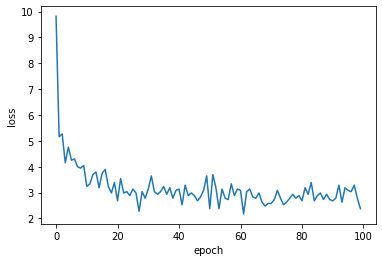

In [130]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()

In [52]:
#Logistic Regression with scikit-learn
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=0)

In [54]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9298245614035088

In [55]:
#prediction with scikit-learn
sgd.predict(x_test[0:10])

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [56]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])